In [201]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Ejercicios: Álgebra lineal: 1,4,5,6,7,11,12,15,16,17

Ejercicios: Aprendizaje automático: 1,2,3

---

### Ejercicio 11

In [74]:
A = np.array([[1,2,-1],[1,0,1],[4,-4,5]])
#A = np.array([[2,1,0],[0,5,3],[0,0,8]])

In [75]:
A

array([[ 1,  2, -1],
       [ 1,  0,  1],
       [ 4, -4,  5]])

In [86]:
B = np.linalg.inv(A)

In [85]:
zk = np.array([1,-8,np.pi])
i = 0
while i<100:
    #normalizar
    zk = (1/np.linalg.norm(zk))*zk
    #kesimo vector 
    zk = B@zk
    i+=1

In [87]:
#Los valores propios de la inversa de A son los reciprocos de los valores propios de A
1/((zk.T@B)@zk)/np.linalg.norm(zk)**2

0.9999999999999991

In [83]:
#Si v es un vector propio de A^-1 asociado al valor propio lambda, 
#entonces v es un vector propio de A asociado al valor propio 1/lambda 
zk

array([ 0.40824829, -0.40824829, -0.81649658])

----

### Ejercicio 12 **-Corregir**

In [179]:
# Definamos el sistema usando una lista
G1 = np.array([lambda x,y: np.log(x**2+y**2)-np.sin(x*y)-np.log(2)-np.log(np.pi),
     lambda x,y: np.exp(x-y)+np.cos(x*y)])


G2 = np.array([lambda x,y,z: 6*x-2*np.cos(y*z)-1,
     lambda x,y,z: 9*y+np.sqrt(x**2+np.sin(z)+1.06)+0.9,
     lambda x,y,z: 60*z+3*np.exp(-x*y)+10*np.pi-3])

In [180]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    if n==2:
        for i in range(n):
            v[i] = G[i](r[0],r[1])
    if n==3:
        for i in range(n):
            v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [183]:
GetF(G,np.array([0.,0.,0.]))

array([-3.        ,  1.92956301, 31.41592654])

In [184]:
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            if n==2:
                J[i,j] = ( f[i](rf[0],rf[1]) - f[i](rb[0],rb[1])/(2*h))
            if n==3:
                J[i,j] = ( f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2])/(2*h))
            
    return J

In [205]:
def NewtonRaphson(G,r,itmax=100000,error=1e-6):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        #print(dvector)
        
        it += 1
    
    return r,dvector

In [206]:
r,dvector = NewtonRaphson(G2,np.array([0.,0.,0.]))

In [207]:
G2[0](r[0],r[1],r[2])

-6.051454432939662

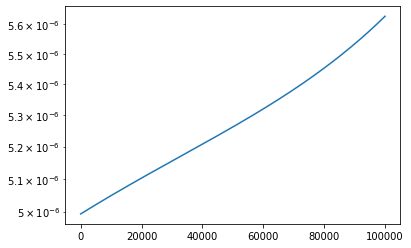

In [208]:
plt.plot(dvector)
plt.yscale('log')